# Принятие решений в бизнесе

# Содержание:

1. [Описание проекта](#1)
2. [Описание данных](#2)
3. [Цели исследования](#3)<br/>
    3.1 [Часть 1](#3.1)<br/>
    3.2 [Часть 2](#3.2)<br/>
4. [Проект. Часть 1](#4) <br/>
    4.1 [Загрузка данных и подготовка их к анализу](#4.1)<br/>
    4.2 [Применение фреймворков ICE и RICE для приоритизации гипотез](#4.2)<br/>
    4.3 [Вывод](#4.3)<br/>
5. [Проект. Часть 2](#5)<br/>
    5.1 [Загрузка данных и подготовка их к анализу](#5.1)<br/>
    5.2 [Вывод](#5.2)<br/>
6. [Анализ А/В теста](#6)<br/>
    6.1 [Стабильность кумулятивных метрик](#6.1)<br/>
    6.1.1 [Построение графиков кумулятивной выручки по дням и группам A/B-тестирования](#6.1.1)<br/>
    6.1.2 [Построение графиков среднего чека по группам](#6.1.2)<br/>
    6.1.3 [Построение графика относительного различия для среднего чека](#6.1.3)<br/>
    6.1.4 [Построение графика кумулятивной конверсии](#6.1.4)<br/>
    6.1.5 [Построение графика относительного различия кумулятивных конверсий](#6.1.5)<br/>
    6.2 [Анализ выбросов и всплесков: крайние значения данных](#6.2)<br/>
    6.3 [Подсчет статистической значимости различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей](#6.3)<br/>
    6.4 [Подсчет статистической значимости различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным](#6.4)<br/>
7. [Вывод](#7)
    

## Описание проекта <a id="1"></a>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Описание данных <a id="2"></a>

**Файл /datasets/hypothesis.csv** 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Цели исследования <a id="3"></a>

### Часть 1 <a id="3.1"></a>

* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2 <a id="3.2"></a>

**Проанализируйте A/B-тест:**

* Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**Примите решение по результатам теста и объясните его. Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

## Проект. Часть 1 <a id="4"></a>

### Загрузка данных и подготовка их к анализу <a id="4.1"></a>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import datetime as dt

In [2]:
# чтение файлов
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [3]:
# функция для получения основной информации о датафрейме
def data_info(rest_data):
    display(rest_data.head(10)) #вывод первых 10 значений
    display(rest_data.isna().sum()) # кол-во пропусков
    display(rest_data.describe()) # статист-е пок-и
    rest_data.info()

In [4]:
pd.set_option('display.max_colwidth', False)
data_info(hypothesis)   

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В названиях колонок видны нарушения стиля, приведу все к нижнему регистру.

In [5]:
#приведение название колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

### Применение фреймворков ICE и RICE для приоритизации гипотез <a id="4.2"></a>

In [6]:
#применение фреймворка ICE для приоритизации гипотез
pd.set_option('display.max_colwidth', False)
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] \
/ hypothesis['efforts'], 1)
hypothesis[['hypothesis', 'ICE']].sort_values(by = ['ICE'], ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [7]:
#применение фреймворка RICE для приоритизации гипотез
pd.set_option('display.max_colwidth', False)
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] \
* hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = ['RICE'], ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод <a id="4.3"></a>

Замечаний по данным не было, изменила только регистр в названиях колонок.

Используя фреймворк ICE в тройке лучших оказались гипотезы под номерами 8, 0, 7.
При использовании фреймворка RICE в тройке лучших уже возникли изменения, а именно мы видим гипотезы под номерами 7, 2, 0.
Такое различие в приоритизации появилось из-за учета при расчете RICE показателя "reach" - охват пользователей по 10-балльной шкале.
При выборе гипотез для работы, я бы остановилась на 7й и 0й, так как они обе попали в тройку по обоим способам приоритизации. 

## Проект. Часть 2 <a id="5"></a>

### Загрузка данных и подготовка их к анализу <a id="5.1"></a>

In [8]:
data_info(orders)  

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#форматирование времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
#подсчёт явных дубликатов
orders.duplicated().sum()

0

In [11]:
data_info(visitors)  

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


date        0
group       0
visitors    0
dtype: int64

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#форматирование времени
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [13]:
#подсчёт явных дубликатов
visitors.duplicated().sum()

0

In [14]:
print("Дата начала теста -" , visitors['date'].min())
print("Дата окончания теста -" , visitors['date'].max())

Дата начала теста - 2019-08-01 00:00:00
Дата окончания теста - 2019-08-31 00:00:00


Проверим, есть ли пересечение пользователей между группами и если есть, удалим их.

In [15]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [16]:
visitors_AB = orders.loc[orders['visitorId'].isin(visitorsA)& orders['visitorId'].isin(visitorsB),'visitorId'].unique()
np.array(visitors_AB).size

58

Пользователей, которые попали в обе группы - 58 человек. Удалим их.

In [17]:
#до изменений
(orders.groupby('visitorId')['group'].nunique()>1).count()

1031

In [18]:
#после изменений
orders = orders.loc[~orders['visitorId'].isin(visitors_AB)]
(orders.groupby('visitorId')['group'].nunique()>1).count()

973

### Вывод <a id="5.2"></a>

Данные загружены и подготовлены. Были выполнены преобразования типов данных у даты. Явных дубликатов нет.

В A/B тесте у нас 2 группы, А и В. Тем самым исключается увеличение вероятности ошибок 1  рода из-за множественного теста.

Были пересечения пользователей в группах, их удалила.

Дата начала теста 2019-08-31 00:00:00, дата окончания - 2019-08-31 00:00:00. Тест проходил 1 месяц.

## Анализ A/B теста <a id="6"></a>

### Стабильность кумулятивных метрик <a id="6.1"></a>

In [19]:
#создание массива уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [20]:
#сбор агрегированных кумулятивных по дням данных о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [21]:
#сбор агрегированных кумулятивных по дням данных о пользователях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group'])
    ].agg({'date': 'max',
           'group': 'max',
           'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [22]:
#объединение кумулятивных данных в одной таблице и присваивание ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


#### Построение графиков кумулятивной выручки по дням и группам A/B-тестирования <a id="6.1.1"></a>

In [23]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [24]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

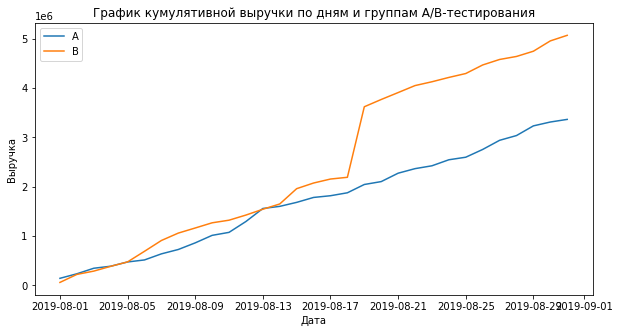

In [25]:
#построение графика выручки группы А
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#построение графика выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
#подписи осей:
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.show()

График выручки в группе А почти равномерно увеличивается в течение всего теста.
График выручки в группе В в одной точке резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### Построение графиков среднего чека по группам <a id="6.1.2"></a>

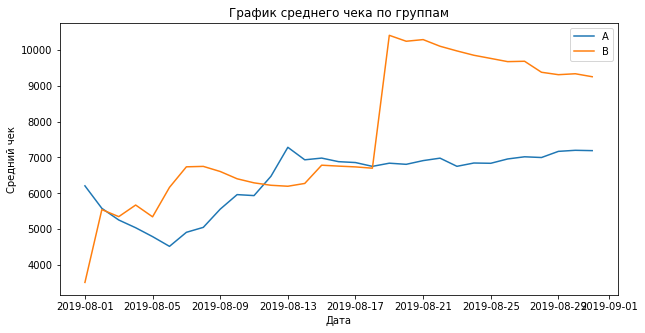

In [26]:
#построение графиков среднего чека по группам 
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
#подписи осей:
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.legend()
plt.title('График среднего чека по группам')
plt.show()

Также в одной точке средний чек в группе В резко вырос. Возможно, в группу B во второй половине теста попали крупные заказы (резкий всплеск на графике).
Средний чек становится равномерным ближе к концу теста: установился для группы A и снизился для группы B.

#### Построение графика относительного различия для среднего чека <a id="6.1.3"></a>

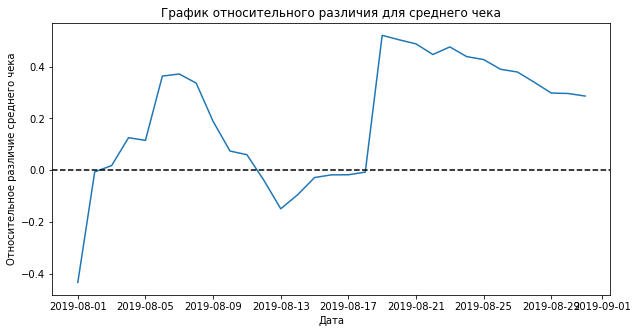

In [27]:
#сбор данных в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])

#построение отношения средних чеков
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) \
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#добавление оси X
plt.axhline(y=0, color='black', linestyle='--')
#подписи осей:
plt.xlabel("Дата")
plt.ylabel("Относительное различие среднего чека")
plt.title('График относительного различия для среднего чека')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! 

#### Построение графика кумулятивной конверсии <a id="6.1.4"></a>

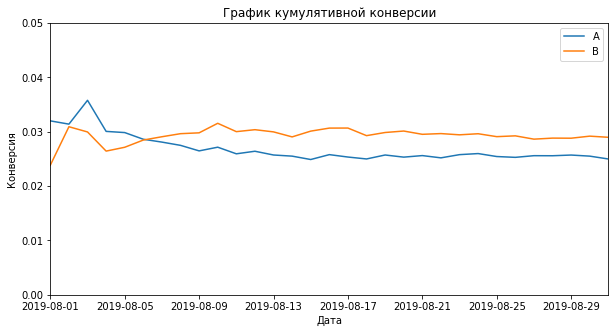

In [28]:
#счет кумулятивной конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#отделение данных по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#отделение данных по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#построение графиков
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
#подписи осей:
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()
plt.title('График кумулятивной конверсии')
# задаем масштаб осей
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), 0, 0.05])
plt.show()

Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Построение графика относительного различия кумулятивных конверсий <a id="6.1.5"></a>

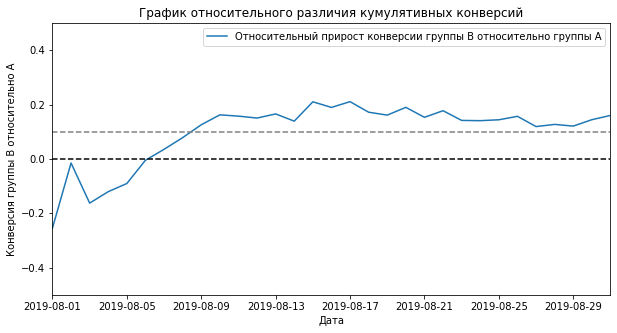

In [29]:
#построение графика относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                        left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] \
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([cumulativeData['date'].min(), cumulativeData['date'].max(), -0.5, 0.5])
#подписи осей:
plt.xlabel("Дата")
plt.ylabel("Конверсия группы В относительно А")
plt.title('График относительного различия кумулятивных конверсий')
plt.show()

Группа B брала разгон в начале теста и теперь существенно обгоняет группу А.

### Анализ выбросов и всплесков: крайние значения данных <a id="6.2"></a>

In [30]:
#подсчет количества заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


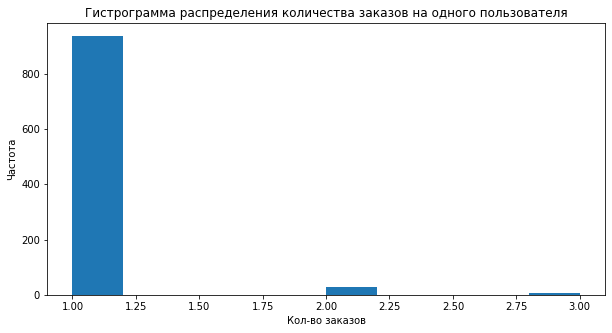

In [31]:
#построение гистрограммы распределения количества заказов на одного пользователя
plt.figure(figsize=(10, 5))
plt.hist(ordersByUsers['orders']) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
#подписи осей:
plt.xlabel("Кол-во заказов")
plt.ylabel("Частота")
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

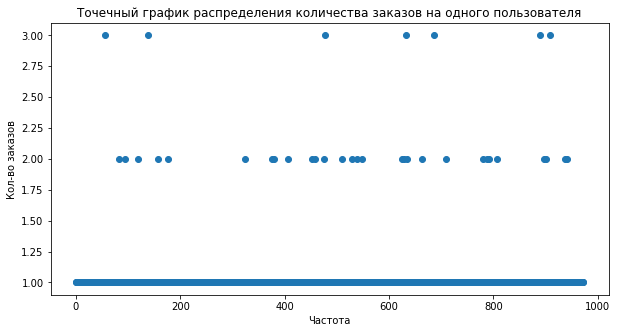

In [32]:
#построение диаграммы методом scatter()
x_values = pd.Series(range(0, len(ordersByUsers))) #серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график распределения количества заказов на одного пользователя')
#подписи осей:
plt.ylabel("Кол-во заказов")
plt.xlabel("Частота")
plt.show()

Выводы подтверждаются: много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

In [33]:
#определение 90, 95 и 99 перцентилей количества заказов на одного пользователя
np.percentile(ordersByUsers['orders'], [90, 95, 99]) 
#Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили

array([1., 1., 2.])

Не более 5% пользователей оформляли больше чем 2 заказа и не более 1% сделали больше 4х заказов. Не более 10% пользователей заказывали больше 1 раза. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

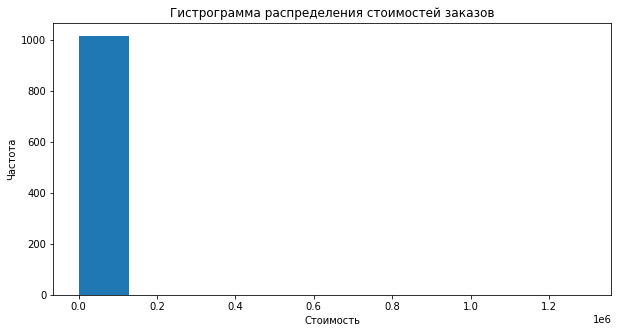

In [34]:
#построение гистограммы распределения стоимостей заказов
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue']) 
plt.title('Гистрограмма распределения стоимостей заказов')
#подписи осей:
plt.xlabel("Стоимость")
plt.ylabel("Частота")
plt.show()

Большинство заказов оказались в пределе 0,6~0,7*10^6, построим точечную диаграмму для уточнения распределения выручки.

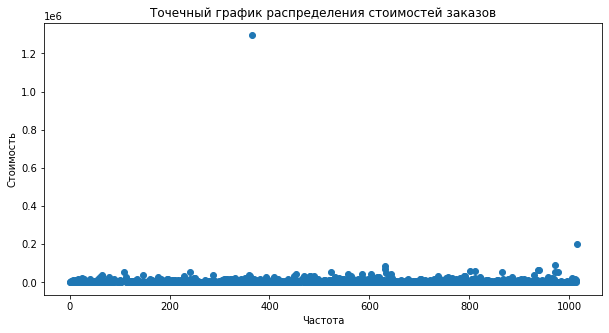

In [35]:
#построение точечной диаграммы 
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график распределения стоимостей заказов')
#подписи осей:
plt.ylabel("Стоимость")
plt.xlabel("Частота")
plt.show()

На графике заметны точечные выбросы, один из них равен приблизительно > 1200000 рублей.
Однако большинство заказов всё-таки имеет меньшую и однородную выручку.

In [36]:
#определение 90, 95 и 99 перцентилей среднего чека в выборке
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233,2 рублей. Не более 10% заказов дороже 18168 рублей. 
За верхнюю границу стоимости заказа логично взять 28000.

### Подсчет статистической значимости различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей <a id="6.3"></a>

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

**Промежуточное описание полученных данных**
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [37]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Для проверки будем использовать непараметрический критерий Манна-Уитни, так как с большой долей вероятности можно утверждать что данные у нас распределены ненормально. 

(Но здесь мы врезаемся в спор аналитиков, о правдивости и выгоде для бизнеса использования данного критерия, а не Стьюдента).

In [38]:
#подсчет статистической значимости различий в среднем количестве заказов между группами

#создание переменных ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']
#в них для пользователей, которые заказывали хотя бы 1 раз, указывается число совершённых заказов
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [39]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() \
                                                                - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() \
                                                                 - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 
results = st.mannwhitneyu(sampleA, sampleB)
if results.pvalue < 0.05:
    print('По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160
По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


По «сырым» данным различия в среднем числе заказов групп A и B есть. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы B равен 16%.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [40]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке, 
#передадим критерию mannwhitneyu() данные о выручке с заказов. 
#А ещё найдём относительные различия в среднем чеке между группами:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],\
                          alternative = 'two-sided')
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                 orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue']\
                                                            .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
if results.pvalue < 0.05:
    print('По неочищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287
По неочищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако относительный выигрыш группы B равен 28.7%.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно. 

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

</div>


### Подсчет статистической значимости различий в среднем числе заказов на пользователя и среднем чеке между группами по «очищенным» данным <a id="6.4"></a>

In [41]:
#подсчет количества аномальных пользователей атрибутом shape
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > \
                      int(np.percentile(ordersByUsers['orders'], [95]))]['userId'], \
                      ordersByUsersB[ordersByUsersB['orders'] > \
                      int(np.percentile(ordersByUsers['orders'], [95]))]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Всего аномальных пользователей = 86


In [42]:
#подсчет статистической значимости различий в среднем количестве заказов между группами теста по очищенным данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

In [43]:
#применение статистического критерия Манна-Уитни к полученным выборкам
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')
if results.pvalue < 0.05:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')

alpha = 0.05
p-value = 0.016
Относительный показатель 'B' и 'A' = 0.174
По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


Относительный выигрыш группы B равен 17.4%.

In [44]:
#применение статистического критерия Манна-Уитни к полученным выборкам по среднему чеку
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 
results = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')
if results.pvalue < 0.05:
    print('По очищенным данным разница в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным разница в средних чеках в группах A и B НЕТ!')

alpha = 0.05
p-value = 0.727
Относительный показатель 'B' и 'A' = -0.034
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


Относительный проигрыш группы B равен 3.4%.

## Вывод <a id="7"></a>

Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A. Данная разница показателей конверсии между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать выгоду изменений группы B.